In [1]:
import tensorflow as tf # 下面语句都可以达到检测目的
tf.test.is_gpu_available()
tf.config.list_physical_devices('GPU')
tf.test.gpu_device_name()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


'/device:GPU:0'

In [2]:
import os,shutil
original_dataset_dir = r'‪D:\BaiduNetdiskDownload\PetImages'
base_dir = 'D:\BaiduNetdiskDownload\cats_and_dogs_small'
# os.mkdir(base_dir)
train_dir = os.path.join(base_dir,'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)


validation_cats_dir = os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir= os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir)


test_cats_dir = os.path.join(test_dir,'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)

# fnames = [r'D:\BaiduNetdiskDownload\PetImages\cats\{}.jpg'.format(i) for i in range(1000)]
# fnames1 = [r'D:\BaiduNetdiskDownload\cats_and_dogs_small\train\cats\{}.jpg'.format(i) for i in range(1000)]
# for fname,fname1 in zip(fnames,fnames1):
#     src = fname
#     dst = fname1
#     shutil.copyfile(src,dst)

# fnames = [r'D:\BaiduNetdiskDownload\PetImages\cats\{}.jpg'.format(i) for i in range(1000,1500)]
# fnames1 = [r'D:\BaiduNetdiskDownload\cats_and_dogs_small\validation\cats\{}.jpg'.format(i) for i in range(1000,1500)]
# for fname,fname1 in zip(fnames,fnames1):
#     src = fname
#     dst = fname1
#     shutil.copyfile(src,dst)
    
# fnames = [r'D:\BaiduNetdiskDownload\PetImages\cats\{}.jpg'.format(i) for i in range(1500,2000)]
# fnames1 = [r'D:\BaiduNetdiskDownload\cats_and_dogs_small\test\cats\{}.jpg'.format(i) for i in range(1500,2000)]
# for fname,fname1 in zip(fnames,fnames1):
#     src = fname
#     dst = fname1
#     shutil.copyfile(src,dst)

# fnames = [r'D:\BaiduNetdiskDownload\PetImages\dogs\{}.jpg'.format(i) for i in range(1000)]
# fnames1 = [r'D:\BaiduNetdiskDownload\cats_and_dogs_small\train\dogs\{}.jpg'.format(i) for i in range(1000)]
# for fname,fname1 in zip(fnames,fnames1):
#     src = fname
#     dst = fname1
#     shutil.copyfile(src,dst)

# fnames = [r'D:\BaiduNetdiskDownload\PetImages\dogs\{}.jpg'.format(i) for i in range(1000,1500)]
# fnames1 = [r'D:\BaiduNetdiskDownload\cats_and_dogs_small\validation\dogs\{}.jpg'.format(i) for i in range(1000,1500)]
# for fname,fname1 in zip(fnames,fnames1):
#     src = fname
#     dst = fname1
#     shutil.copyfile(src,dst)
    
# fnames = [r'D:\BaiduNetdiskDownload\PetImages\dogs\{}.jpg'.format(i) for i in range(1500,2000)]
# fnames1 = [r'D:\BaiduNetdiskDownload\cats_and_dogs_small\test\dogs\{}.jpg'.format(i) for i in range(1500,2000)]
# for fname,fname1 in zip(fnames,fnames1):
#     src = fname
#     dst = fname1
#     shutil.copyfile(src,dst)

In [2]:
print('total training cat images:',len(os.listdir(train_cats_dir)))
print('total train dog images:',len(os.listdir(train_dogs_dir)))
print('total validation cat images',len(os.listdir(validation_cats_dir)))
print('total validation dog images',len(os.listdir(validation_dogs_dir)))
print('total validation cat images',len(os.listdir(test_cats_dir)))
print('total validation dog images',len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total train dog images: 1000
total validation cat images 500
total validation dog images 500
total validation cat images 500
total validation dog images 500


In [3]:
from keras import layers
from keras import models 
from keras import optimizers
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [10]:
#数据预处理
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')
for data_batch,label_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('label batch shape:',label_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
label batch shape: (20,)


Epoch 1/30
100/100 [==============================] - 18s 179ms/step - loss: 0.0670 - acc: 0.9745 - val_loss: 0.1062 - val_acc: 0.9570
Epoch 2/30
100/100 [==============================] - 18s 176ms/step - loss: 0.0355 - acc: 0.9865 - val_loss: 0.0713 - val_acc: 0.9730
Epoch 3/30
100/100 [==============================] - 18s 180ms/step - loss: 0.0160 - acc: 0.9950 - val_loss: 0.1141 - val_acc: 0.9600
Epoch 4/30
100/100 [==============================] - 19s 187ms/step - loss: 0.0186 - acc: 0.9945 - val_loss: 0.1296 - val_acc: 0.9540
Epoch 5/30
100/100 [==============================] - 18s 180ms/step - loss: 0.0043 - acc: 0.9990 - val_loss: 0.1476 - val_acc: 0.9570
Epoch 6/30
100/100 [==============================] - 18s 181ms/step - loss: 0.0116 - acc: 0.9975 - val_loss: 0.1372 - val_acc: 0.9560
Epoch 7/30
100/100 [==============================] - 18s 180ms/step - loss: 0.0143 - acc: 0.9980 - val_loss: 0.1466 - val_acc: 0.9580
Epoch 8/30
100/100 [==============================] - 1

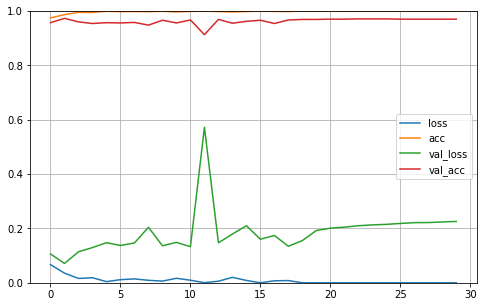

In [12]:
#训练模型
import matplotlib.pyplot as plt
import pandas as pd
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
model.save('cats_and_dogs_samll_1.h5')
model.load_weights('cats_and_dogs_samll_1.h5')
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

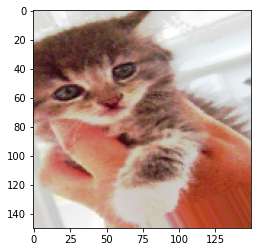

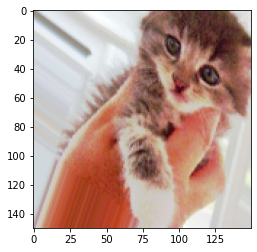

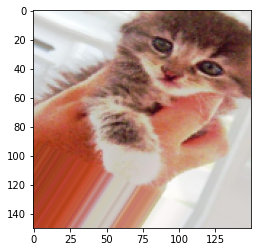

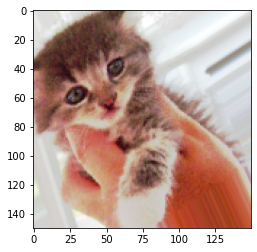

In [5]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
datagen = ImageDataGenerator(rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,     #随机错切变换的角度
                           zoom_range=0.2,      #随机缩放
                           horizontal_flip=True,   #将一半的图像水平翻转
                           fill_mode='nearest')    #填充新增像素的办法
fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path,target_size=(150,150))
x = image.img_to_array(img)   #形状（150，150，3）
x = x.reshape((1,)+x.shape)   #形状（1，150，150，3）

i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 13s 125ms/step - loss: 0.6952 - acc: 0.5130 - val_loss: 0.6872 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6891 - acc: 0.5515 - val_loss: 0.6700 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6760 - acc: 0.5795 - val_loss: 0.6611 - val_acc: 0.6000
Epoch 4/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6605 - acc: 0.5935 - val_loss: 0.6567 - val_acc: 0.5930
Epoch 5/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6539 - acc: 0.6010 - val_loss: 0.6426 - val_acc: 0.6120
Epoch 6/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6361 - acc: 0.6485 - val_loss: 0.6250 - val_acc: 0.6340
Epoch 7/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6223 - acc: 0.6605 - val_lo

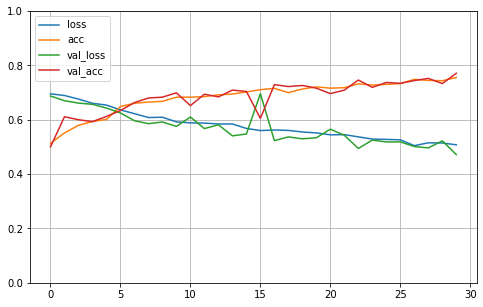

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
model.save('cats_and_dogs_samll_2.h5')

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 22s 222ms/step - loss: 0.4731 - acc: 0.7595 - val_loss: 0.2325 - val_acc: 0.9110
Epoch 2/5
100/100 [==============================] - 18s 176ms/step - loss: 0.2707 - acc: 0.8865 - val_loss: 0.2250 - val_acc: 0.9160
Epoch 3/5
100/100 [==============================] - 18s 177ms/step - loss: 0.2114 - acc: 0.9075 - val_loss: 0.1396 - val_acc: 0.9490
Epoch 4/5
100/100 [==============================] - 18s 177ms/step - loss: 0.1759 - acc: 0.9275 - val_loss: 0.1408 - val_acc: 0.9370
Epoch 5/5
100/100 [==============================] - 18s 177ms/step - loss: 0.1539 - acc: 0.9380 - val_loss: 0.1792 - val_acc: 0.9270


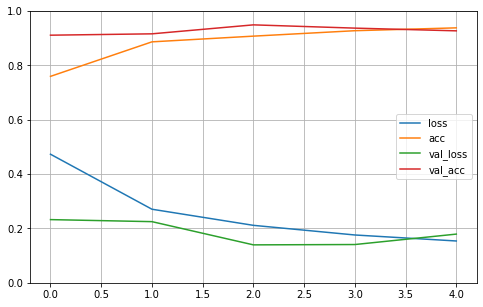

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models,layers
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [44]:
print(model.predict_classes(img_tensor))

[[[155 155 155 155]
  [155 155 286 155]
  [155 155 286 286]
  [155 155 286 155]]]


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

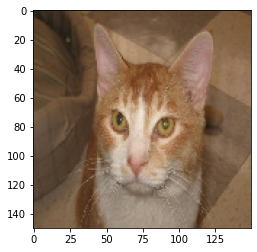

In [9]:
#卷积神经网络的可视化
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img_path = r'D:\BaiduNetdiskDownload\cats_and_dogs_small\test\cats\1957.jpg'
from keras.models import load_model
# model = load_model(r'C:\Users\24132\python深度学习\cats_and_dogs_small_2.h5')

model.summary()

img = image.load_img(img_path,target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()




Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 22s 216ms/step - loss: 0.6957 - acc: 0.5160 - val_loss: 0.6719 - val_acc: 0.5350
Epoch 2/5
100/100 [==============================] - 9s 92ms/step - loss: 0.6686 - acc: 0.5780 - val_loss: 0.6462 - val_acc: 0.5940
Epoch 3/5
100/100 [==============================] - 9s 93ms/step - loss: 0.6501 - acc: 0.6105 - val_loss: 0.6217 - val_acc: 0.6430
Epoch 4/5
100/100 [==============================] - 9s 94ms/step - loss: 0.6252 - acc: 0.6415 - val_loss: 0.6360 - val_acc: 0.6160
Epoch 5/5
100/100 [==============================] - 10s 97ms/step - loss: 0.6182 - acc: 0.6570 - val_loss: 0.5918 - val_acc: 0.6770


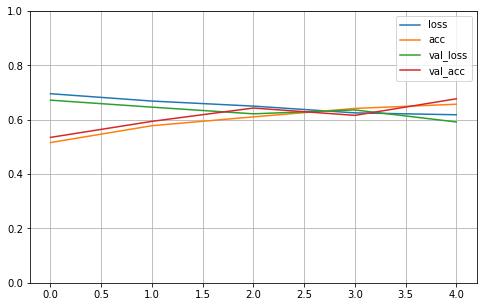

In [7]:
#为下面的可视化提供可以调用的model
import os
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
import numpy as np
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

os.environ['CUDA_VISIBLE_DEVICES'] = '/gpu:0'
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)
model.save('cats_and_dogs_samll_2.h5')

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[[1]]
(1, 148, 148, 32)


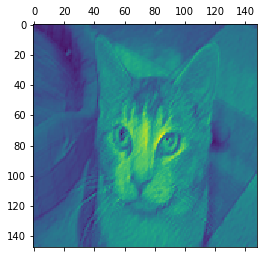

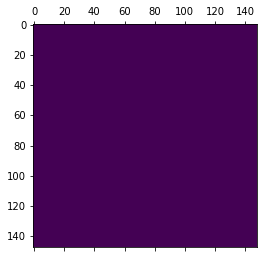

In [10]:
#将处理过程中的某一层次的输出结果可视化
from keras import models
import matplotlib.pyplot as plt

print(model.predict_classes(img_tensor))

layer_outputs = [layer.output for layer in model.layers[:6]]
# print(layer_outputs)
activation_model = models.Model(inputs=model.input,outputs=layer_outputs)  #重新创建一个模型
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0,:,:,4],cmap='viridis')   #激活第四个通道
plt.matshow(first_layer_activation[0,:,:,14],cmap='viridis')  #激活第十四个通道

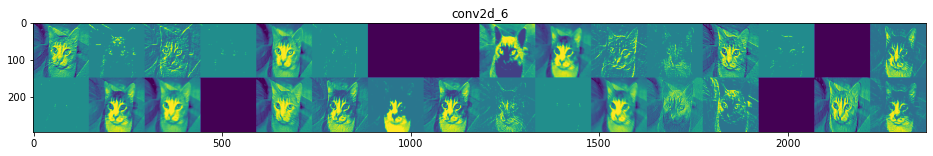

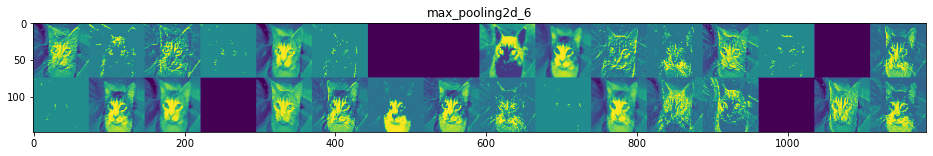

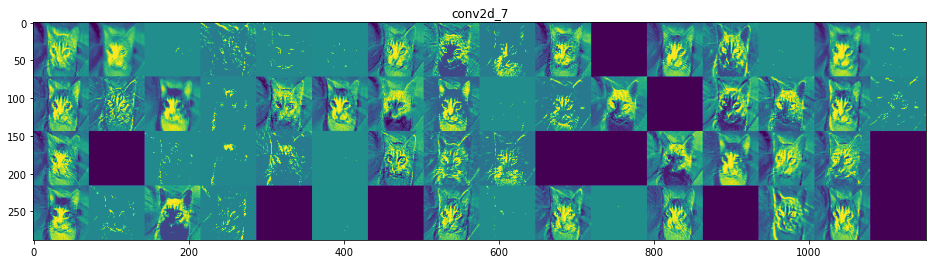

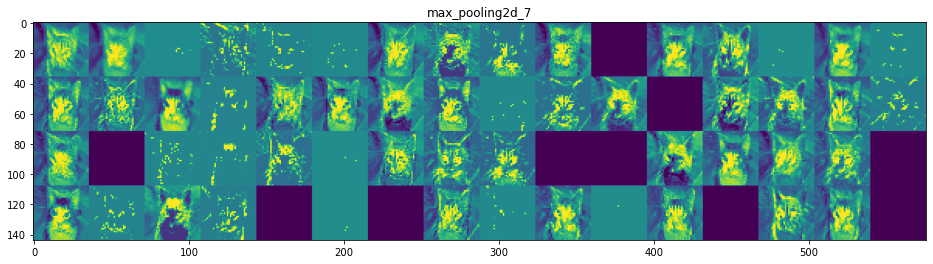

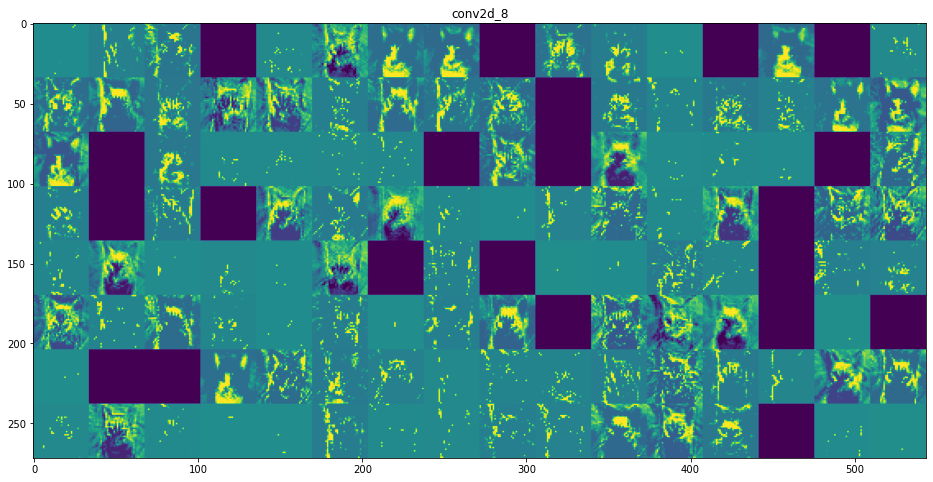

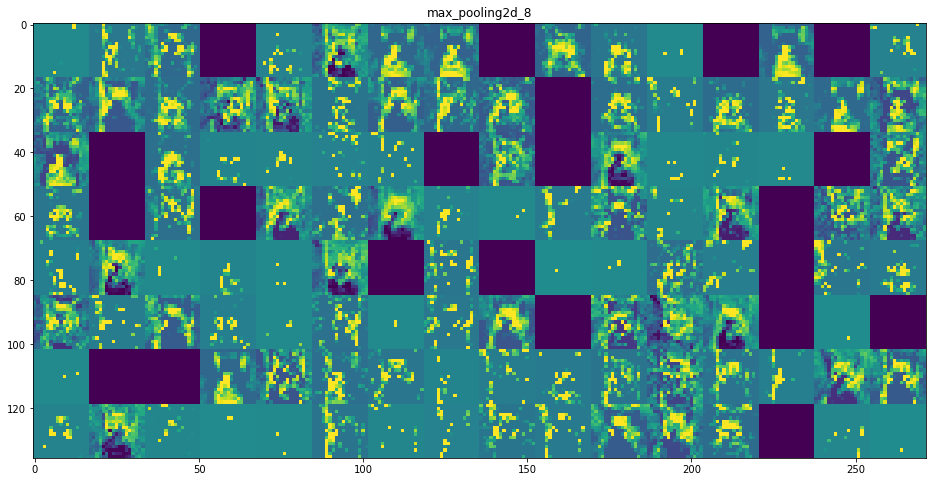

In [13]:
#将每个中间激活的所有通道都进行可视化

layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name,layer_activation in zip(layer_names,activations):
    n_features = layer_activation.shape[-1]  #特征图的特征个数
    size = layer_activation.shape[1]   #特征图的形状(1,size,size,n_features)
    n_cols= n_features//images_per_row
    display_grid = np.zeros((size*n_cols,images_per_row*size))   #将图片整合到一起
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col*images_per_row+row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image,0,255).astype('uint8')    #将矩阵的元素限制在0-255
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')  #aspect:控制轴的纵横比   cmap:将标量数据映射到色彩图
plt.show()

In [ ]:
#将滤波板可视化

from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])
# grads = K.gradients(loss, model.input)[0]
with tf.GradientTape() as gtape:
    grads = gtape.gradient(loss, model.input)
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

# Run gradient ascent for 40 steps
step = 1.  # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    # Compute the gradient of the input picture wrt this loss
    with tf.GradientTape() as gtape:
        grads = gtape.gradient(loss, model.input)

    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    # Run gradient ascent for 40 steps
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

In [ ]:
# 可视化激活的热力图

from keras.applications.vgg16 import VGG16

K.clear_session()

# Note that we are including the densely-connected classifier on top;
# all previous times, we were discarding it.
model = VGG16(weights='imagenet')

from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# The local path to our target image
img_path = r'C:\Users\24132\python模块学习\opencv\1.png'

# `img` is a PIL image of size 224x224
img = image.load_img(img_path, target_size=(224, 224))

# `x` is a float32 Numpy array of shape (224, 224, 3)
x = image.img_to_array(img)

# We add a dimension to transform our array into a "batch"
# of size (1, 224, 224, 3)
x = np.expand_dims(x, axis=0)

# Finally we preprocess the batch
# (this does channel-wise color normalization)
x = preprocess_input(x) 


preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

np.argmax(preds[0])

# This is the "african elephant" entry in the prediction vector
african_elephant_output = model.output[:, 386]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('block5_conv3')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (512,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `block5_conv3`,
# given a sample image
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([x])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the elephant class
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)


heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()